# Implementacion de Web Scraping con Python

Programar búsquedas en la web es una actividad que requiere el conocimiento acerca de la tecnología WWW (HTML, XML, URL, XPath, DOM, API) y los protocolos para la consultas (HTTP o protocolo solicitud- respuestas)

## Descripcion Del Problema

1. Busque las páginas web referidas al personaje: Leslie Lamport.  Guarde los resultados de la búsqueda en una bd orientada a grafos o un archiivo csv, que registre página (link) y página buscada (fetched). Con las páginas visitadas construya el grafo resultante.  NOTA: seleccione la bd de grafo de su preferencia.

## Explicacion

Primeramnete elegimos un motor de busqueda para hacer la peticion de lo que de desamos, En nuestro caso usaremos Ask. Realizamos la peticion de Leslie Lamport para extraer de esta las paginas y los links relacionados

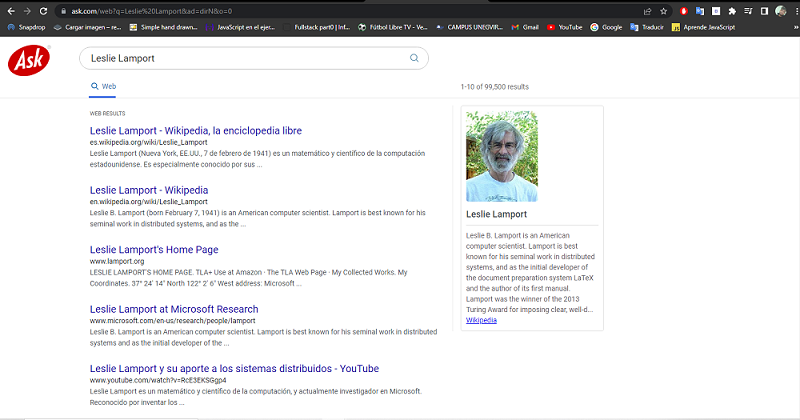


Luego analizamos en codigo HTML para saber donde se encuentra la informacion que se queremos recuperar, en nuestro caso deseas en link de la pagina con en nombre 

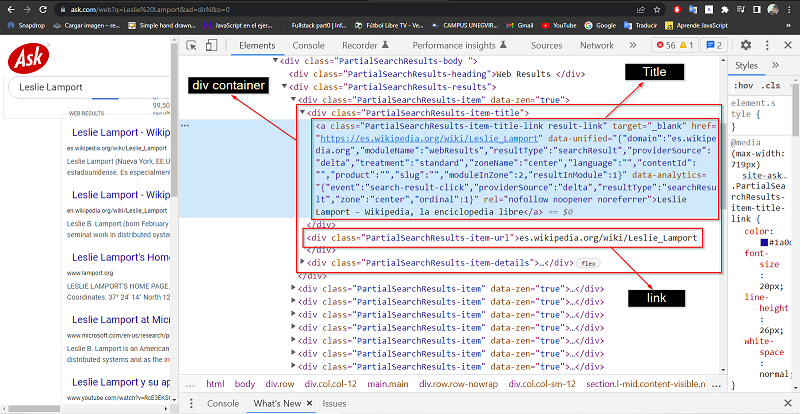



## Arquitectura 

Para construir un software completo de web scraping, un algoritmo adecuado no es suficiente. Necesitamos conectar varios servicios entre sí que nos permita:

 1. Comunicar con el software algunas entradas (los sitios web que deseamos raspar) y diferentes parámetros
 2. Guarde los datos raspados en una unidad de almacenamiento
 
 

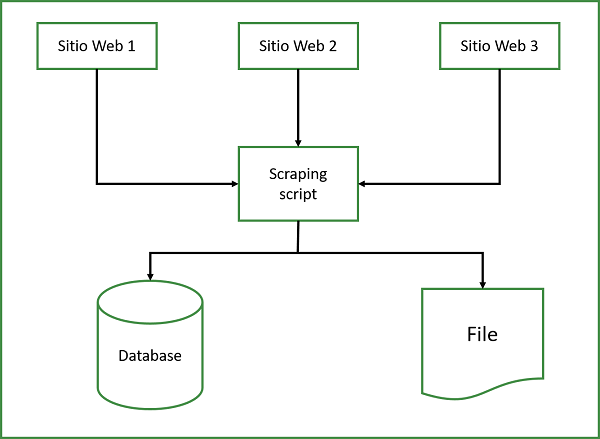

## Diagrama UML

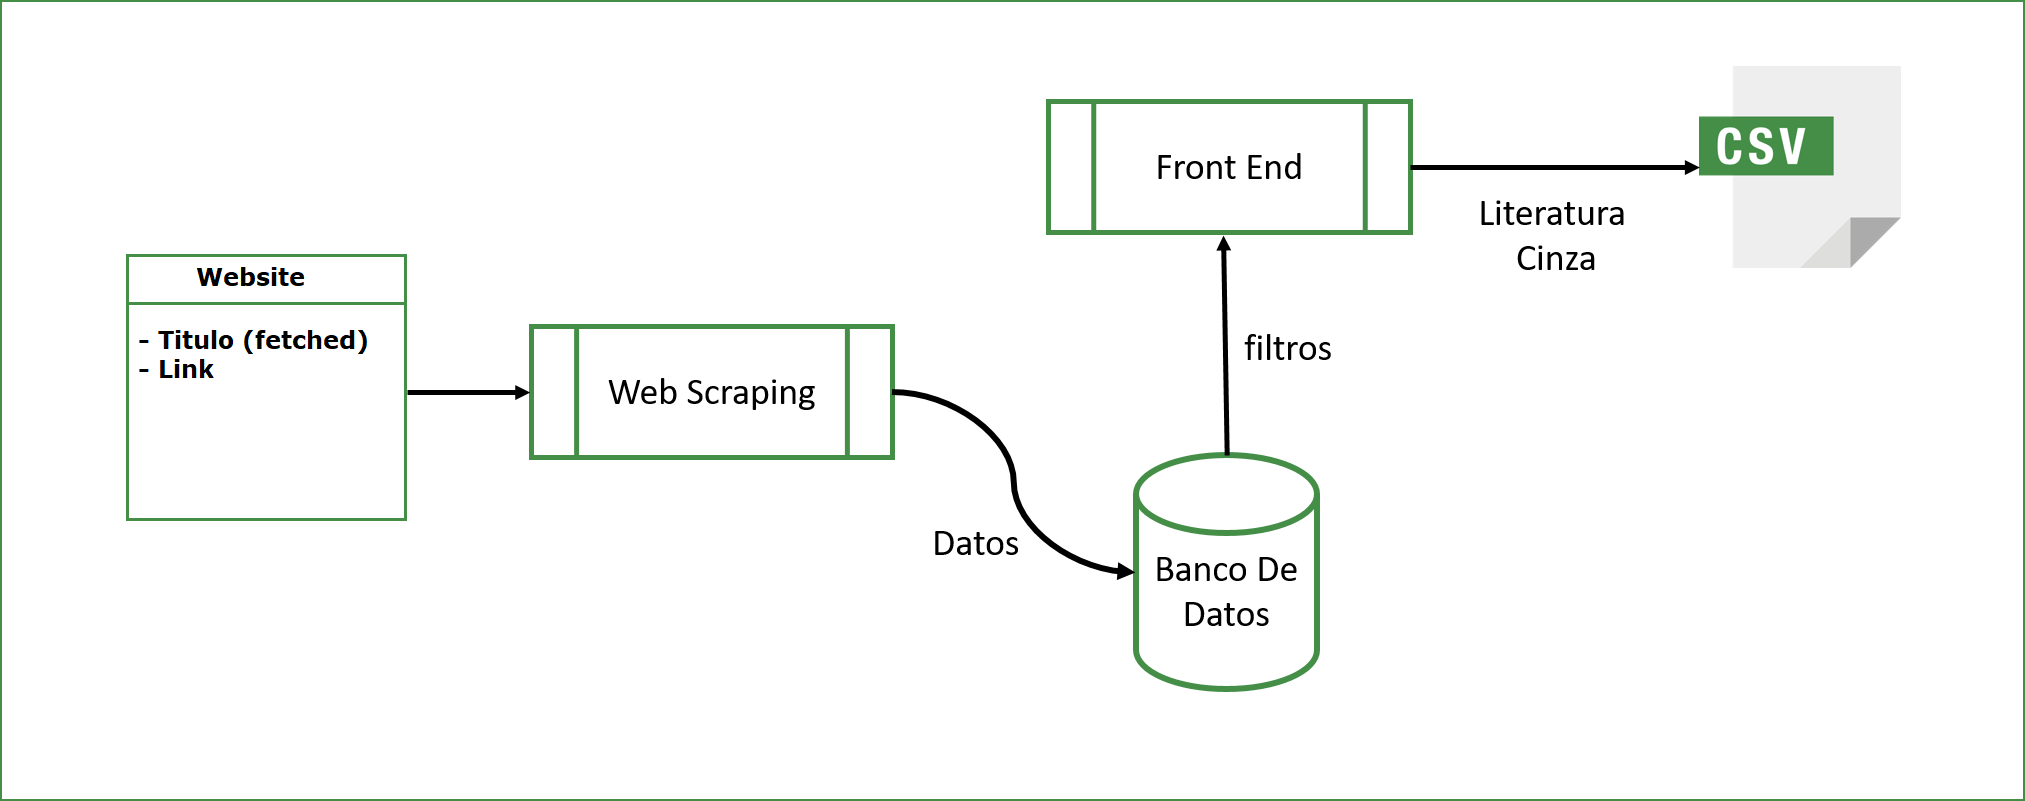

## Implementacion (codigo)

In [4]:
#Agregamos las Librerias
import requests
from bs4 import BeautifulSoup
from csv import writer

# Hacer una solicitud de obtencion al motor de busqueda 
website = 'https://www.ask.com/web?q=Leslie%20Lamport&ad=dirN&o=0'
result = requests.get(website)

#Verificamos la Respuesta
print(result)

<Response [200]>


200 OK
El código de respuesta de estado satisfactorio HTTP 200 OK indica que la solicitud ha tenido éxito. Una respuesta 200 es almacenable de forma predeterminada.

In [5]:
#trasformamos la peticion y obtenemos el HTML de la pagina 
soup = BeautifulSoup(result.content, 'html.parser')

#Inspeccionamos la pagina y obtemos la zona donde se encuntran la informacion que deseamos 
contentDiv = soup.find_all("div",class_="PartialSearchResults-item")

with open('BusquedasWeb.csv','w', encoding='utf8',newline='') as f:
    thewriter = writer(f)
    header = ['Page','Link']
    thewriter.writerow(header)
    #Buscamos en especifico la informacion que deseamos y lo agregamos al arcrivo csv
    for list in contentDiv:
        title = list.find("a",class_="PartialSearchResults-item-title-link result-link").text
        link = list.find("div",class_="PartialSearchResults-item-url").text
        info = [title,link]
        print(info)
        thewriter.writerow(info)

['Leslie Lamport - Wikipedia, la enciclopedia libre', 'es.wikipedia.org/wiki/Leslie_Lamport']
['Leslie Lamport - Wikipedia', 'en.wikipedia.org/wiki/Leslie_Lamport']
["Leslie Lamport's Home Page", 'www.lamport.org']
['Leslie Lamport at Microsoft Research', 'www.microsoft.com/en-us/research/people/lamport']
['Leslie Lamport y su aporte a los sistemas distribuidos - YouTube', 'www.youtube.com/watch?v=RcE3EKSGgp4']
['Leslie Lamport - Ciberninjas', 'ciberninjas.com/leslie-lamport']
['The Writings of Leslie Lamport', 'lamport.azurewebsites.net/pubs/pubs.html']
['Todos los libros del autor Leslie Lamport', 'www.todostuslibros.com/autor/leslie-lamport']
['Leslie Lamport - A.M. Turing Award Laureate', 'amturing.acm.org/award_winners/lamport_1205376.cfm']
['Leslie Lamport | Turing Award, Biography, & Facts | Britannica', 'www.britannica.com/biography/Leslie-Lamport']
['Leslie Lamport - frwiki.wiki', 'es.frwiki.wiki/wiki/Leslie_Lamport']


## Resultado

La escritura en CSV deberia crear un arcrivo parecido a este

| Title | Link | 
| --- | --- |
| Leslie Lamport - Wikipedia, la enciclopedia libre | es.wikipedia.org/wiki/Leslie_Lamport |
| Leslie Lamport - Wikipedia | en.wikipedia.org/wiki/Leslie_Lamport |
| Leslie Lamport's Home Page | www.lamport.org |
| Leslie Lamport at Microsoft Research | www.microsoft.com/en-us/research/people/lamport |
| Leslie Lamport y su aporte a los sistemas distribuidos - YouTube | www.youtube.com/watch?v=RcE3EKSGgp4 |
| Leslie Lamport - A.M. Turing Award Laureate | amturing.acm.org/award_winners/lamport_1205376.cfm |
| Leslie Lamport | Turing Award, Biography, & Facts | Britannica| www.britannica.com/biography/Leslie-Lamport |
| Leslie Lamport - frwiki.wiki | es.frwiki.wiki/wiki/Leslie_Lamport |